# Homework 5: Classification (50 points)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 5 is due on Thursday , February 9 at 9:00am. Late work will not be accepted.  

In [1]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Intuition on classification (16 points)

#### Question 1.1 (8 points)
You have a large dataset `breast-cancer` which has 11 columns. The first ten are attributes of the person that might be predictive of whether or not someone has breast-cancer, and the 11th column indicates whether they have it or not. 99% of the table contains examples of people who do not have breast cancer. 

Imagine you are trying to use a k-NN classifier to use the first ten columns to predict whether or not someone has breast cancer. You split your training and test set up as necessary, you develop a 7 Nearest Neighbors classifier, and you notice your classifier predicts every point in the test set to be a person who does not have breast cancer. Is there a problem with your code? Explain this phenomenon.   

Yes there is a problem with using this method of analysis. Because there are so many parameters being analyzed (10) this analysis would suffer from the curse of dimensionality, which means 'nearest neighbor' essentially just gives random points. 99% of the sample contains people who do not have breast cancer and the variables being tested are not necessarily predictors, so it's highly unlikely for there to be a point that has 4/7 nearest points all be people who have breast cancer if they are randomly chosen. 

#### Question 1.2 (8 points)

You have a training set of 35 examples of characteristics of fruits along with what fruit is actually being described. 25 of the examples of Apples, and 10 of the examples are Oranges. 

You decide to make a k-NN classifier. Give the smallest possible choice for k such that the classifier will predict Apple for every point, regardless of how the data is spread out. Explain how you picked your k. 

Imagine that ties are broken at random for even values of k, so there is no guarantee of what will be picked if there is a tie.

Suppose there is a point thats 10 nearest neighbors are all of the 10 orange points. Then for it to be predicted as an apple point 10 needs to be less than half the k nearest neighbors. The smallest value of k that satisfies this is 21. 

## 2. Cars classification (34 points) ##

The data below contains 397 observations on the following 9 variables:
-    mpg: miles per gallon

-    cylinders: number of cylinders between 4 and 8

-    displacement: engine displacement (cu. inches)

-    horsepower: engine horsepower

-    weight: vehicle weight (lbs.)

-    acceleration: time to accelerate from 0 to 60 mph (sec.)

-    year: model year (modulo 100)

-    origin: origin of car (1. American, 2. European, 3. Japanese)




In [2]:
# this commands loads the data into a data frame
auto_df=pd.read_csv("auto.csv")
auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [7]:
sha = auto_df.shape
sha

(397, 9)

#### Question 2.1 ( Binarization, 3 points)

Create a new column in the data frame containing a binary variable called **mpg_b**: it should be equal to 1 if **mpg** contains a value above its median and equal to 0 if **mpg** contains a value below its median.

In [10]:
# code here and in additional cells if needed
mpg_med = np.median(auto_df['mpg'])
auto_df['mpg_b'] = np.zeros(sha[0])

#let values equal to the median be considered 1
for i in range(sha[0]):
    if auto_df['mpg'][i] >= mpg_med:
        auto_df['mpg_b'][i] = 1
    else:
        auto_df['mpg_b'][i] = 0

C:\Users\ja123\AppData\Local\Temp\ipykernel_924\134438158.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df['mpg_b'][i] = 0
C:\Users\ja123\AppData\Local\Temp\ipykernel_924\134438158.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df['mpg_b'][i] = 1


In [35]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_b
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.0


#### Question 2.2 (Numerical and graphical summaries, 7 points)

Explore the data graphically (and numerically if you think it is useful) in order to investigate the association between **mpg_b** and the other features.  Which of the other features seem most likely to be useful in predicting **mpg_b**? Describe your findings.


Blue is Above Median and Red is Below Median


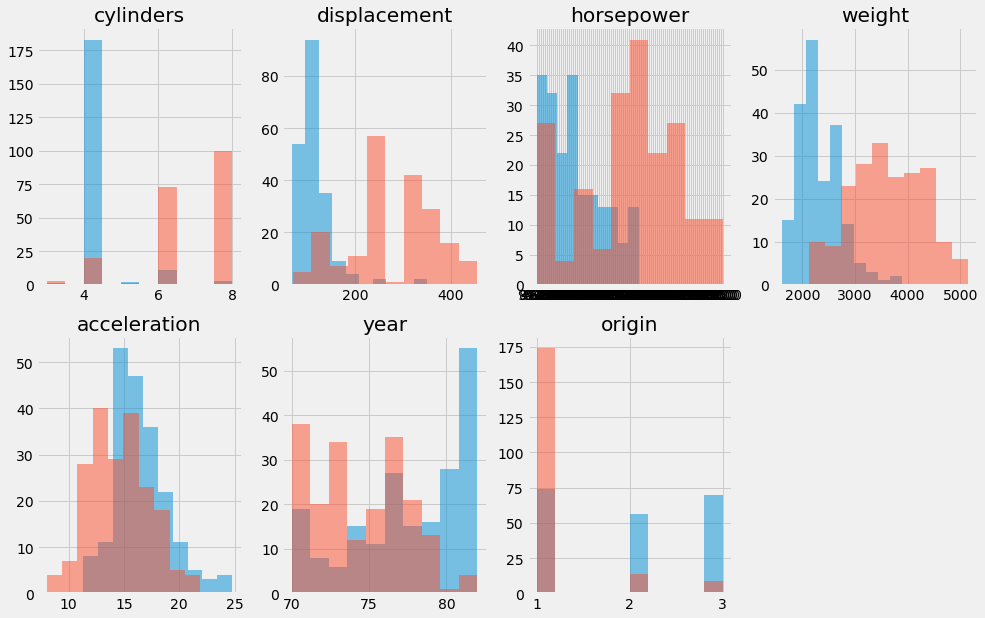

In [80]:
# code here and in additional cells if needed
j = 1
cols = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
upper = auto_df[auto_df['mpg_b']==1]
lower = auto_df[auto_df['mpg_b']==0]

fig, axs = plots.subplots(2, 2, figsize=(15, 15))

for i in cols:
    plots.subplot(3,4,j)
    plots.hist(upper[i],label = 'Above Median', alpha = 0.5)
    plots.hist(lower[i],label = 'Below Median', alpha = 0.5)
    plots.title(i)
    j+=1
print("Blue is Above Median and Red is Below Median")

The features that appear useful for predicting mpg_b appear to be cylinders, displacement,and weight because they have the least overlapped area.

#### Question 2.3 (Split the data, 3 points)

Split the data into a training set and a test set. Select **randomly** 50 rows of your data frame and extract their data into a test data frame. The rest of the 347 rows should form your training data frame.

In [81]:
# code here and in additional cells if needed
auto_permuted = auto_df.sample(frac=1)
test = auto_permuted.iloc[0:50]
train = auto_permuted.iloc[50:397]

In [86]:
print(test.shape)
test.head()

(50, 10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_b
274,20.3,5,131.0,103.0,2830,15.9,78,2,audi 5000,0.0
383,32.0,4,91.0,67.00,1965,15.7,82,3,honda civic (auto),1.0
161,16.0,6,250.0,105.0,3897,18.5,75,1,chevroelt chevelle malibu,0.0
79,26.0,4,96.0,69.00,2189,18.0,72,2,renault 12 (sw),1.0
71,19.0,3,70.0,97.00,2330,13.5,72,3,mazda rx2 coupe,0.0


In [87]:
print(train.shape)
train.head()

(347, 10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_b
315,24.3,4,151.0,90.00,3003,20.1,80,1,amc concord,1.0
284,20.6,6,225.0,110.0,3360,16.6,79,1,dodge aspen 6,0.0
374,36.0,4,105.0,74.00,1980,15.3,82,2,volkswagen rabbit l,1.0
189,15.5,8,304.0,120.0,3962,13.9,76,1,amc matador,0.0
158,16.0,8,318.0,150.0,4498,14.5,75,1,plymouth grand fury,0.0


#### Question 2.4 (kNN for mpg_b, 10 points)

The goal here is to construct a kNN algorithm that has high **accuracy** (proportion of test examples labeled correctly). Recall that you have to take into consideration: (i) the type of features (categorical, quantitative); (ii) the scaling of the features; (iii) the distance you use; (iv) the features in the model; (v) the number of neighbors, k.

You can choose to use only the variables that seem most asociated with **mpg_b** in Q2.2. Try several values of k, and report on your test errors. Which value of k performs best?

**Note:** You need to write the code for the algorithm and not use kNN functions in Python libraries. You may use any of the functions we wrote in the lecture notebooks.


In [105]:
# returns a data frame with X_test appended by a column of Class prediction
def classify(X_train,Y_train, X_test, k):
    """Classify data in X_test using k-nearest neighbor classification with the given training table."""
    #training = X_train
    n=X_test.shape[0] # the number of test cases
    
    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority(topkclasses))
    
    report_df=X_test.copy()
    report_df['Class']=pred_class
    
    return report_df

def minmax_scaling(x):
    "Convert any array of numbers"
    return (x - np.min(x))/(np.max(x)-np.min(x))  

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def closest(X_train, Y_train, point, k):
    """A df containing the k closest rows in the training df to array 'point' """
    attributes=X_train.copy()
    attributes['Distance']=all_distances(attributes, point)
    attributes['Class']=Y_train
    attributes=attributes.sort_values('Distance')    
    topk = attributes.head(k)
    return topk

def all_distances(X_train, point):
    """The distance between point (an array of numbers) and the numbers in row i of attribute data frame."""
    attributes = X_train.copy()
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point,axis=1)

def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1's, and 0 otherwise."""
    ones = topkclasses[topkclasses.Class==1].shape[0]
    zeros = topkclasses[topkclasses.Class==0].shape[0]
    if ones > zeros:
        return 1
    else:
        return 0


In [98]:
# code here and in additional cells if needed
# features to use are cylinders, displacement, and weight
# scaling of the features: cylinders -> minmax_scaling, displacement/weight -> standard units
# distance used will be euclidean

#Training Data
X_train = pd.DataFrame(
        {"cylinders": minmax_scaling(train.cylinders),
         "displacement": standard_units(train.displacement),
         "weight": standard_units(train.displacement)})
X_test = pd.DataFrame(
        {"cylinders": minmax_scaling(test.cylinders),
         "displacement": standard_units(test.displacement),
         "weight": standard_units(test.displacement)})
Y_train = train.mpg_b
Y_test = test.mpg_b

In [117]:
# k=1
np.mean(Y_test==classify(X_train,Y_train,X_test,1).Class)

0.78

In [107]:
# k=5 
np.mean(Y_test==classify(X_train,Y_train,X_test,5).Class)

0.84

In [115]:
# k=31
np.mean(Y_test==classify(X_train,Y_train,X_test,31).Class)

0.86

In [116]:
# k=51
np.mean(Y_test==classify(X_train,Y_train,X_test,51).Class)

0.86

In [118]:
#k=1000
np.mean(Y_test==classify(X_train,Y_train,X_test,1000).Class)

0.46

Letting k equal 1 definitely has the worst accuracy, but past 31 it becomes hard to tell if there is improvement in the accuracy. Nevertheless if we set k to be ridiculously large (and not really possible in this sample) then the accuracy falls like it should. Thus, it seems that 0.86 is close to the best accuracy that this model can produce. 

#### Question 2.5 (kNN for country of origin, 14 points)

The goal here is to construct a kNN algorithm for classfication of country of origin. Instructions are similar to those in Q2.4 - the main difference is that `origin` has 3 labels so you need to modify your code to account for that. This is an example of **multiclass classification**.

Issues to consider:
- as before, you need training and testing data
- try several values of k 
- feature selection, scaling, distance are important
- are the three groups balanced?
- how do you break ties?

**Hints (on tie breaking)**: (i) random selection between tied labels; (ii) use the distances when tied (closer neighbors are more relevant).

Blue is C1, Red is C2, Green is C3


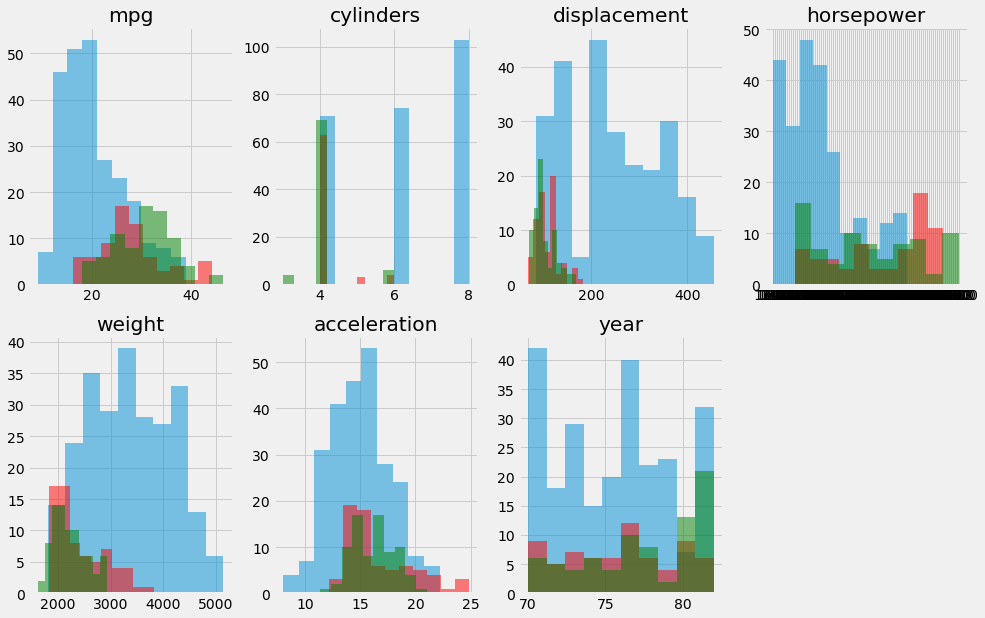

In [124]:
# code here and in additional cells if needed
# features to use are: 
o1 = auto_df[auto_df['origin']==1]
o2 = auto_df[auto_df['origin']==2]
o3 = auto_df[auto_df['origin']==3]

cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','year']

fig, axs = plots.subplots(2, 2, figsize=(15, 15))
j = 1
for i in cols:
    plots.subplot(3,4,j)
    plots.hist(o1[i],label = 'country1', alpha = 0.5)
    plots.hist(o2[i],label = 'country2', alpha = 0.5, color = 'Red')
    plots.hist(o3[i],label = 'country3', alpha = 0.5, color = 'Green')
    plots.title(i)
    j+=1
print("Blue is C1, Red is C2, Green is C3")

In [144]:
#Needed changes to accomdate multiclass classification:
def majority(topkclasses):
    """1 if the majority of the "Class" column is 1's, and 0 otherwise."""
    ones = topkclasses[topkclasses.Class==1].shape[0]
    twos = topkclasses[topkclasses.Class==2].shape[0]
    threes = topkclasses[topkclasses.Class==3].shape[0]
    big = max(ones,twos,threes)
    if threes == big:
        return 3
    elif twos == big:
        return 2
    else:
        return 1
    
#We'll try using features: mpg and displacement
#scaling of features: mpg/displacement -> standard units, equally weighted
#Euclidean Distance
#Training Data
X_train = pd.DataFrame(
        {"mpg": standard_units(train.mpg),
         "displacement": standard_units(train.displacement)})
X_test = pd.DataFrame(
        {"mpg": standard_units(test.mpg),
         "displacement": standard_units(test.displacement)})
Y_train = train.origin
Y_test = test.origin

In [153]:
# k=3
np.mean(Y_test==classify(X_train,Y_train,X_test,3).Class)

0.68

In [150]:
# k=5
np.mean(Y_test==classify(X_train,Y_train,X_test,5).Class)

0.7

In [154]:
# k=9
np.mean(Y_test==classify(X_train,Y_train,X_test,9).Class)

0.62

The three groups are definitely not balanced. There are many more samples that have an origin value of 1 than the other two groups. Because of the low sample counts for groups 2 and 3 I broke ties always in the favor of the group 3 and then in favor of group 2. The displacement and mpg data were pretty variable so I do not expect there to be many tie scenarios however. Having k=5 closest neighbors seemed to return the best accuracy. Going to k=9 drastically drops the accuracy. 